In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [3]:
from keras.constraints import min_max_norm
from keras.layers import Layer
import tensorflow as tf
import keras.backend as K
import keras


from pyopenset.keras import ModuleNormalization,AddNewClass


In [4]:
print(keras.__version__)
print(tf.__version__)

2.4.3
2.2.0


In [5]:
Modelo=Sequential()
Modelo.add(Flatten(input_shape=(28,28,1)))
Modelo.add(Dense(60) )
Modelo.add(ModuleNormalization(s=20.0  ))
Modelo.add(Dense(10,kernel_constraint=min_max_norm(1,1),bias_constraint=min_max_norm(0,0),activation='softmax'))


In [6]:
Modelo.compile('adam','categorical_crossentropy')

In [7]:
Modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
module_normalization (Module (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Modelo.save_weights('M1.h5')
Modelo.save('M1.h5')

In [9]:
from keras.models import load_model

How to load a model with our custom layer

In [10]:
Mod=load_model('M1.h5',custom_objects={'ModuleNormalization':ModuleNormalization  })


In [11]:
Mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
module_normalization_1 (Modu (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.datasets import mnist

Defining and optimizing a model on only 8 of the classes

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [14]:
from keras.utils import to_categorical

In [15]:
import numpy as np

Filtro=np.where(y_train<8)[0]
FiltroTeste=np.where(y_test<8)[0]

In [16]:
Y_train=to_categorical(y_train[Filtro],8)
Y_test=to_categorical(y_test[FiltroTeste],8)

In [17]:
Modelo=Sequential()
Modelo.add(Flatten(input_shape=(28,28,1)))
Modelo.add(Dense(60) )
Modelo.add(ModuleNormalization(s=10.0  ))
Modelo.add(Dense(8,kernel_constraint=min_max_norm(1,1),bias_constraint=min_max_norm(0,0),activation='softmax'))


In [18]:
Modelo.compile('adam','categorical_crossentropy',metrics=['accuracy'])
Modelo.fit(x_train[Filtro],Y_train,epochs=1)

1507/1507 [==============================] - 1s 820us/step - loss: 0.2434 - accuracy: 0.9275


In [19]:
Modelo.evaluate(x_test[FiltroTeste],Y_test,batch_size=1)

8017/8017 [==============================] - 4s 523us/step - loss: 0.1831 - accuracy: 0.9464


[0.1830768883228302, 0.9463639855384827]

# Adding Classes 8 and 9 to the model and showing the summary so the user may see Modelo1 has 9 classes, while Modelo2 has 10 (Joint Scenario)

In [20]:
Modelo1=AddNewClass(Modelo, x_train[np.where(y_train==8)[0]] )

In [21]:
Modelo2=AddNewClass(Modelo1, x_train[np.where(y_train==9)[0]] )

In [22]:
Modelo1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                47100     
_________________________________________________________________
module_normalization_2 (Modu (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 549       
Total params: 47,649
Trainable params: 47,649
Non-trainable params: 0
_________________________________________________________________


In [23]:
Modelo2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                47100     
_________________________________________________________________
module_normalization_2 (Modu (None, 60)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


Evaluating on the extended dataset

In [24]:
AvaliacaoFim=to_categorical(y_test,10)

In [25]:
Modelo2.compile('adam','categorical_crossentropy',metrics=['accuracy'])

Modelo2.evaluate(x_test,AvaliacaoFim,batch_size=1)

10000/10000 [==============================] - 5s 525us/step - loss: 0.4434 - accuracy: 0.8550


[0.44344663619995117, 0.8550000190734863]

In [26]:
from sklearn.metrics import classification_report
Prev=Modelo2.predict(x_test)
print(classification_report(np.argmax(AvaliacaoFim,axis=1),np.argmax(Prev,axis=1)))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       980
          1       0.95      0.98      0.96      1135
          2       0.90      0.91      0.90      1032
          3       0.85      0.91      0.88      1010
          4       0.86      0.77      0.81       982
          5       0.82      0.80      0.81       892
          6       0.92      0.95      0.94       958
          7       0.90      0.84      0.87      1028
          8       0.80      0.55      0.65       974
          9       0.64      0.83      0.73      1009

avg / total       0.86      0.85      0.85     10000



# Disjoint setup, using the knowlegde from mnist to classify between two classes of fashion mnist


In [27]:
from keras.datasets import fashion_mnist

In [28]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [29]:
from pyopenset.keras import CreateNewModel

In [30]:
ModeloFashionMnist=CreateNewModel(Modelo,x_train[np.where(y_train==0)[0]] )

In [31]:
ModeloFashionMnist=AddNewClass(ModeloFashionMnist,x_train[np.where(y_train==1)[0]] )

In [32]:
ModeloFashionMnist.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                47100     
_________________________________________________________________
module_normalization_2 (Modu (None, 60)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 122       
Total params: 47,222
Trainable params: 47,222
Non-trainable params: 0
_________________________________________________________________


In [33]:
FiltroTeste=np.where(y_test<2)[0]

In [34]:
Y_test=to_categorical(y_test[FiltroTeste],2)

In [35]:
ModeloFashionMnist.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [36]:
ModeloFashionMnist.evaluate(x_test[FiltroTeste],Y_test,batch_size=1)

2000/2000 [==============================] - 1s 559us/step - loss: 0.4191 - accuracy: 0.9435


[0.41905951499938965, 0.9434999823570251]

In [37]:
import matplotlib.pyplot as plt

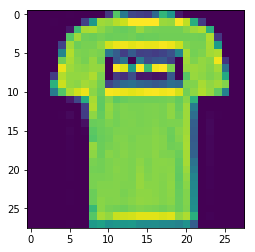

In [38]:
plt.imshow(x_train[np.where(y_train==0)[0]][0]  )

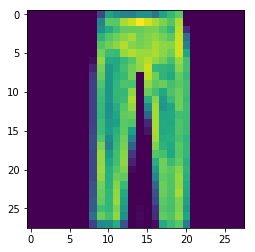

In [39]:
plt.imshow(x_train[np.where(y_train==1)[0]][0]  )